Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [61]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [62]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [63]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [64]:
# Looking at the data:
df.head(10)

bathrooms  bedrooms              created  \
0          2         3  2016-06-24 07:54:24   
1          1         2  2016-06-12 12:19:27   
2          1         1  2016-04-17 03:26:41   
3          1         1  2016-04-18 02:22:02   
4          1         4  2016-04-28 01:32:41   
5          2         4  2016-04-19 04:24:47   
6          1         2  2016-04-27 03:19:56   
7          2         1  2016-04-13 06:01:42   
8          1         1  2016-04-20 02:36:35   
9          2         4  2016-04-02 02:58:15   

                                         description      display_address  \
0  A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...  Metropolitan Avenue   
1                                                         Columbus Avenue   
2  Top Top West Village location, beautiful Pre-w...          W 13 Street   
3  Building Amenities - Garage - Garden - fitness...     East 49th Street   
4  Beautifully renovated 3 bedroom flex 4 bedroom...    West 143rd Street   
5                                                        West 18th Street   
6  Stunning unit with a great location and lots o...    West 107th Street   
7  This huge sunny ,plenty of lights 1 bed/2 bath...     West 21st Street   
8                           <p><a  website_redacted      Hamilton Terrace   
9  This is a spacious four bedroom with every bed...           522 E 11th   

   latitude  longitude  price           street_address interest_level  ...  \
0        41        -74   3000  792 Metropolitan Avenue         medium  ...   
1        41        -74   5465      808 Columbus Avenue            low  ...   
2        41        -74   2850          241 W 13 Street           high  ...   
3        41        -74   3275     333 East 49th Street            low  ...   
4        41        -74   3350    500 West 143rd Street            low  ...   
5        41        -74   7995     350 West 18th Street         medium  ...   
6        41        -74   3600    210 West 107th Street            low  ...   
7        41        -74   5645     155 West 21st Street            low  ...   
8        41        -74   1725      63 Hamilton Terrace         medium  ...   
9        41        -74   5800               522 E 11th            low  ...   

   high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
0                    0        0              0                 0        0   
1                    0        0              0                 0        0   
2                    0        0              0                 0        0   
3                    0        0              0                 0        0   
4                    0        0              0                 0        0   
5                    0        0              0                 0        0   
6                    0        0              0                 0        0   
7                    0        0              0                 0        1   
8                    0        0              0                 0        0   
9                    0        0              0                 0        0   

   exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
0          0     0             0                  0                     0  
1          0     0             0                  0                     0  
2          0     0             0                  0                     0  
3          0     0             0                  0                     0  
4          0     0             0                  0                     0  
5          0     0             0                  0                     0  
6          0     0             0                  0                     0  
7          0     0             0                  0                     0  
8          0     0             0                  0                     0  
9          0     0             0                  0                     0  

[10 rows x 34 columns]

In [65]:
# Looking at the average rent, the median rent, minimum rent and maximum rent:
pd.options.display.float_format = '{:,.0f}'.format
df['price'].describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

In [66]:
# Getting the guess for rent price, rounded to 2 decimal places:
rent_guess = df['price'].mean()
rent_guess.round(2)

3579.56

In [67]:
# Calculate the errors:
rent_errors = rent_guess - df['price']
rent_errors

0          580
1       -1,885
2          730
3          305
4          230
         ...  
49347      380
49348     -370
49349      985
49350      230
49351    1,380
Name: price, Length: 48818, dtype: float64

In [68]:
# Now to calculate the mean absolute error:
mean_abs_rent_error = rent_errors.abs().mean()
mean_abs_rent_error.round(2)

1201.53

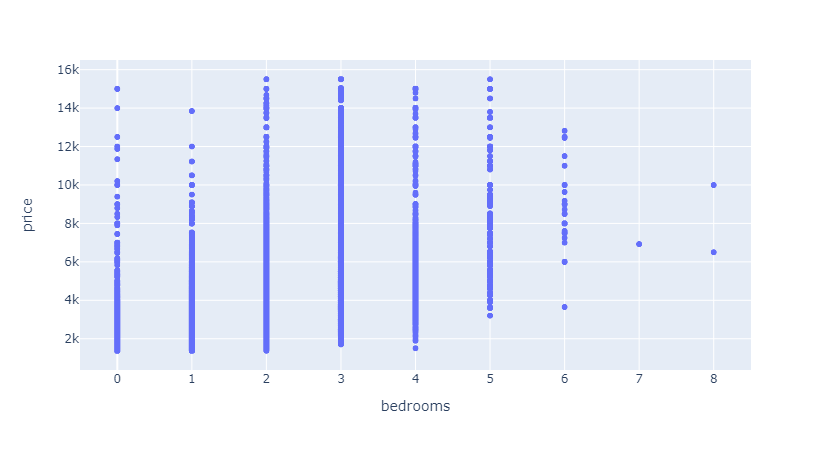

In [69]:
# Descriptive scatterplot of bedrooms and price of rent:
import plotly.express as px
px.scatter(df, x='bedrooms', y='price')

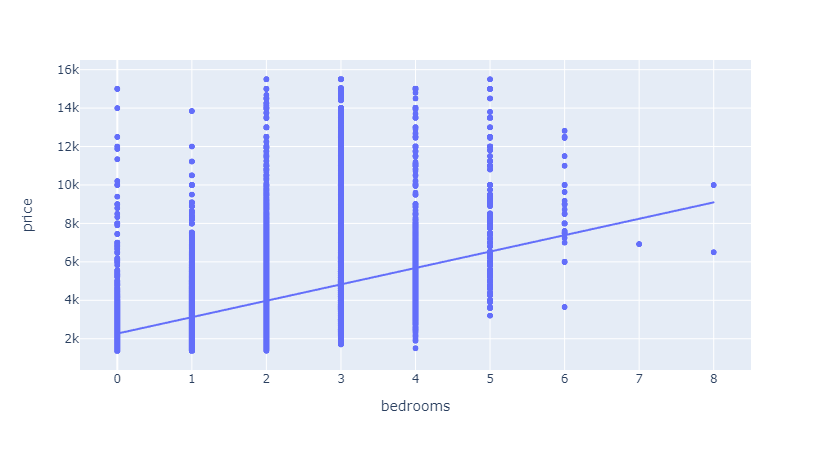

In [70]:
# Predictive regression by adding line of best fit:
px.scatter(df, x='bedrooms', y='price', trendline='ols')

In [71]:
# Now to use scikitlearn for a linear regression:
# Import estimator class from scikitlearn:
from sklearn.linear_model import LinearRegression

In [72]:
# Instantiating the class:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#  Arranging X features matrix and y target vector:
features = ['bedrooms']
target = 'price'
X_train = df[features]
y_train = df[target]

In [74]:
# Looking at X_train:
X_train

bedrooms
0             3
1             2
2             1
3             1
4             4
...         ...
49347         2
49348         1
49349         1
49350         0
49351         2

[48818 rows x 1 columns]

In [75]:
# Looking at y_train:
y_train

0        3000
1        5465
2        2850
3        3275
4        3350
         ... 
49347    3200
49348    3950
49349    2595
49350    3350
49351    2200
Name: price, Length: 48818, dtype: int64

In [76]:
# Now to fit the model:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# Apply the model to new data, a 3 bedroom apartment:
bed_rooms = 3
X_test = [[bed_rooms]]
y_pred = model.predict(X_test)
y_pred.round(2)

array([4827.74])

In [78]:
# Creating a function to make new predictions:
def predict(bed_rooms):
    y_pred = model.predict([[bed_rooms]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'${estimate:,.0f} estimated price for a {bed_rooms:,.0f} bedroom apartment in NYC.'
    explanation = f'In this linear regression, each additional bedroom adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict(4)) 

$5,681 estimated price for a 4 bedroom apartment in NYC.
In this linear regression, each additional bedroom adds $853.


In [79]:
# Stretch goal with 2 independent variables:

In [80]:
# Instantiating the class for multivariate:
model2 = LinearRegression()
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
#  Arranging X features matrix and y target vector:
features2 = ['bedrooms', 'bathrooms']
target2 = 'price'
X_train2 = df[features2]
y_train2 = df[target2]

In [82]:
# Looking at X_train2:
X_train2

bedrooms  bathrooms
0             3          2
1             2          1
2             1          1
3             1          1
4             4          1
...         ...        ...
49347         2          1
49348         1          1
49349         1          1
49350         0          1
49351         2          1

[48818 rows x 2 columns]

In [83]:
# Looking at y_train2:
y_train2

0        3000
1        5465
2        2850
3        3275
4        3350
         ... 
49347    3200
49348    3950
49349    2595
49350    3350
49351    2200
Name: price, Length: 48818, dtype: int64

In [84]:
# Fitting new model:
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# Applying the new model to new data, a 3 bedroom, 1 bathroom apartment:
bed_rooms = 3
bath_rooms = 1
X_test2 = [[bed_rooms, bath_rooms]]
y_pred2 = model2.predict(X_test2)
y_pred2.round(2)

array([3719.29])

In [86]:
# Creating a function to make new predictions based on bedrooms and bathrooms:
def predict2(bed_rooms, bath_rooms):
    y_pred2 = model2.predict([[bed_rooms, bath_rooms]])
    estimate = y_pred2[0]
    coefficient = model2.coef_[0]
    result = f'${estimate:,.0f} estimated price for a {bed_rooms:,.0f} bedroom, {bath_rooms:,.0f} bathroom apartment in NYC.'
    explanation = f'In this linear regression, each additional bedroom/bathroom adds ${coefficient:,.0f}.'
    return result + '\n' + explanation

print(predict2(2, 1))

$3,334 estimated price for a 2 bedroom, 1 bathroom apartment in NYC.
In this linear regression, each additional bedroom/bathroom adds $385.
